In [ ]:
'''
 * Copyright (c) 2008 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

##  Linear Dynamical Systems

To motivate the concept of linear dynamical systems, consider the following practical problem. Suppose we want to measure the value of an unknown quantity $ z $ using a noisy sensor that returns an observation $ x $, which is the value of $ z $ plus zero-mean Gaussian noise. Given a single measurement, our best guess for $ z $ is to assume that $ z = x $. However, we can improve our estimate of $ z $ by taking many measurements and averaging them, because the random noise terms will tend to cancel each other out.

Now, let's complicate the situation by assuming that we wish to measure a quantity $ z $ that is changing over time. We can take regular measurements of $ x $, so at some point in time, we have obtained $ x_1, x_2, \ldots, x_N $, and we want to estimate the corresponding values $ z_1, z_2, \ldots, z_N $. If we simply average the measurements, the error due to random noise will be reduced, but unfortunately, we will just obtain a single averaged estimate, which averages over the changing value of $ z $, thereby introducing a new source of error.

Intuitively, we might do better by taking only the most recent few measurements, say $ x_{N-L}, \ldots, x_N $, and averaging them. If $ z $ is changing slowly and the random noise is high, it would make sense to use a relatively long window of observations. Conversely, if the signal is changing quickly and the noise levels are small, it might be better to use $ x_N $ directly as our estimate for $ z_N $. We could also improve our estimate by forming a weighted average, where more recent measurements contribute more than less recent ones.

Although this argument seems plausible, it does not tell us exactly how to form the optimal weighted average. Instead, we can address problems like this more systematically by defining a probabilistic model that captures both the time evolution and the measurement processes. We can then apply inference and learning methods developed in earlier chapters. The model we focus on here is known as the **Linear Dynamical System (LDS)**.

### From HMM to LDS

We have seen that the **Hidden Markov Model (HMM)** corresponds to a state-space model (shown in Figure 13.5), in which the latent variables are discrete but have arbitrary emission probability distributions. This model describes a broad class of probability distributions, all of which factorize according to:

$$
p(x_1, \ldots, x_N, z_1, \ldots, z_N) = \prod_{n=1}^{N} p(x_n | z_n) p(z_n | z_{n-1}).
$$

We can extend this model to continuous latent variables, where the sum-product operations become integrals instead of sums. This results in the **Linear-Gaussian State-Space Model**, where both the latent variables $ \{ z_n \} $ and observed variables $ \{ x_n \} $ are modeled as multivariate Gaussian distributions, with the means of the observed variables being linear functions of the latent variables.

### Linear-Gaussian Model

The general form of the model involves:

1. **State Transition Model**: This captures the dynamics of the system across time:
   
   $$
   z_n = A z_{n-1} + w_n, \quad w_n \sim \mathcal{N}(0, Q)
   $$

   where $ w_n $ is Gaussian noise with covariance $ Q $, and $ A $ is the state transition matrix.

2. **Measurement Model**: This defines the relationship between the observed variable $ x_n $ and the latent variable $ z_n $:

   $$
   x_n = C z_n + v_n, \quad v_n \sim \mathcal{N}(0, R)
   $$

   where $ v_n $ is Gaussian noise with covariance $ R $, and $ C $ is the observation matrix.

### Efficient Inference

The key to efficient inference in this model is that the posterior distributions for the latent variables at each time step remain in the Gaussian family, which allows for efficient calculation using algorithms such as the **Kalman filter** for continuous latent variables. By contrast, if the emission densities $ p(x_n | z_n) $ are a mixture of Gaussians, exact inference becomes intractable due to the complexity introduced by the mixture model.

### Relationship to Other Models

The Linear Dynamical System can be seen as a generalization of continuous latent variable models, such as **Probabilistic PCA** and **Factor Analysis**. In these models, each pair of nodes $ (z_n, x_n) $ represents a linear-Gaussian latent variable, and inference in these models leads to similar types of Gaussian distributions, ensuring that the inference remains tractable.

Thus, the LDS is a powerful framework that generalizes both the Hidden Markov Model and continuous latent variable models to handle dynamic systems with continuous variables.



## Linear Dynamical Systems (LDS)

In the context of Linear Dynamical Systems (LDS), the latent variables $ \{ z_n \} $ form a Markov chain, unlike the independent case in simple models. This change allows us to model the system as a tree-structured directed graph. Consequently, inference problems can be solved efficiently using the **sum-product algorithm**. The forward recursions in this framework, analogous to the $ \alpha $-messages in the Hidden Markov Model (HMM), are known as the **Kalman filter equations** (Kalman, 1960; Zarchan and Musoff, 2005), and the backward recursions, analogous to the $ \beta $-messages, are known as the **Kalman smoother equations** (Rauch et al., 1965), or the **Rauch-Tung-Striebel (RTS) equations**.

### Kalman Filter and RTS Equations

The **Kalman filter** is widely used in many real-time tracking applications. Since the LDS is a **linear-Gaussian model**, the joint distribution over all variables, as well as all marginals and conditionals, will be Gaussian. This means that the most probable sequence of latent variables is also the sequence of most probable latent states, so there is no need for an analogue of the **Viterbi algorithm** for the LDS.

### Transition and Emission Distributions

For LDS, the transition and emission distributions are typically given as Gaussian distributions. We can express these as:

- Transition Distribution:

$$
p(z_n | z_{n-1}) = \mathcal{N}(z_n | A z_{n-1}, \Gamma)
$$

- Emission Distribution:

$$
p(x_n | z_n) = \mathcal{N}(x_n | C z_n, \Sigma)
$$

- Initial Latent Distribution:

$$
p(z_1) = \mathcal{N}(z_1 | \mu_0, V_0)
$$

### Noisy Linear Equations

The model can also be represented as a set of noisy linear equations:

- Transition equation:

$$
z_n = A z_{n-1} + w_n
$$

- Emission equation:

$$
x_n = C z_n + v_n
$$

- Initial latent state:

$$
z_1 = \mu_0 + u
$$

where the noise terms $ w_n $, $ v_n $, and $ u $ follow Gaussian distributions:

- $ w_n \sim \mathcal{N}(w_n | 0, \Gamma) $
- $ v_n \sim \mathcal{N}(v_n | 0, \Sigma) $
- $ u \sim \mathcal{N}(u | 0, V_0) $

### Model Parameters

The model parameters, denoted by $ \theta = \{ A, \Gamma, C, \Sigma, \mu_0, V_0 \} $, can be estimated using **maximum likelihood** through the **Expectation-Maximization (EM) algorithm**. The **E-step** involves solving the inference problem of determining the posterior marginals for the latent variables. These can be solved efficiently using the sum-product algorithm.

##  Inference in LDS

The inference problem in LDS involves finding the marginal distributions for the latent variables, conditional on the observed sequence. Given the parameter settings, we also wish to make predictions for the next latent state $ z_n $ and the next observation $ x_n $ based on the observed data $ x_1, \ldots, x_{n-1} $. These inference problems can be solved efficiently using the **sum-product algorithm**, which, in the context of LDS, results in the **Kalman filter** and **Kalman smoother** equations.

Because the LDS is a linear-Gaussian model, the joint distribution over all latent and observed variables is a multivariate Gaussian. Thus, in principle, inference problems could be solved by using standard results for the marginals and conditionals of a multivariate Gaussian. The sum-product algorithm, however, provides a more efficient way to perform these computations.

### Forward Recursion and Message Propagation

To solve the inference problem, we treat $ z_N $ as the root node and propagate messages from the leaf node $ h(z_1) $ to the root. From (13.77), the initial message will be Gaussian, and since all subsequent messages are Gaussian, we can express them as:

$$
\hat{\alpha}(z_n) = \mathcal{N}(z_n | \mu_n, V_n)
$$

This is analogous to the propagation of scaled variables $ \hat{\alpha}(z_n) $ in the discrete case of the Hidden Markov Model (HMM). The recursion equation for the forward pass is:

$$
\hat{\alpha}(z_n) = p(x_n | z_n) \int p(z_n | z_{n-1}) \hat{\alpha}(z_{n-1}) p(z_{n-1}) dz_{n-1}
$$

Substituting for the conditionals $ p(z_n | z_{n-1}) $ and $ p(x_n | z_n) $, using (13.75) and (13.76), respectively, the recursion equation becomes:

$$
\hat{\alpha}(z_n) = \mathcal{N}(x_n | C z_n, \Sigma) \int \mathcal{N}(z_n | A z_{n-1}, \Gamma) \mathcal{N}(z_{n-1} | \mu_{n-1}, V_{n-1}) dz_{n-1}
$$

Evaluating the integral results in:

$$
\mathcal{N}(z_n | A \mu_{n-1}, P_{n-1})
$$

where $ \mu_{n-1} $ and $ P_{n-1} $ are known, and the new mean and covariance are updated accordingly.





## Linear Dynamical Systems (LDS) - Continued

We have defined the covariance $ P_{n-1} $ as:

$$
P_{n-1} = A V_{n-1} A^T + \Gamma
$$

Now, combining this result with the first factor on the right-hand side of equation (13.86), and making use of equations (2.115) and (2.116), we obtain the following recursive update equations:

### Kalman Filter Update Equations

1. **Mean of $ z_n $:**

$$
\mu_n = A \mu_{n-1} + K_n (x_n - C A \mu_{n-1})
$$

2. **Covariance of $ z_n $:**

$$
V_n = (I - K_n C) P_{n-1}
$$

3. **Normalization Constant $ c_n $:**

$$
c_n = \mathcal{N}(x_n | C A \mu_{n-1}, C P_{n-1} C^T + \Sigma)
$$

### Kalman Gain

The Kalman gain matrix $ K_n $ is given by:

$$
K_n = P_{n-1} C^T \left( C P_{n-1} C^T + \Sigma \right)^{-1}
$$

Thus, given the values of $ \mu_{n-1} $ and $ V_{n-1} $, along with the new observation $ x_n $, we can evaluate the Gaussian marginal for $ z_n $, having mean $ \mu_n $ and covariance $ V_n $, as well as the normalization constant $ c_n $.

### Initial Conditions for Recursion

The initial conditions for these recursion equations are obtained from:

$$
\hat{\alpha}(z_1) = p(z_1) p(x_1 | z_1)
$$

The initial Gaussian distributions for $ z_1 $ and $ x_1 $ are given by:

- $ p(z_1) = \mathcal{N}(z_1 | \mu_0, V_0) $
- $ p(x_1 | z_1) = \mathcal{N}(x_1 | C \mu_0, \Sigma) $

Thus, using equations (2.115) and (2.116), we can compute the normalization constant $ c_1 $, and the mean and covariance of the initial latent variable $ z_1 $:

1. **Mean of $ z_1 $:**

$$
\mu_1 = \mu_0 + K_1 (x_1 - C \mu_0)
$$

2. **Covariance of $ z_1 $:**

$$
V_1 = (I - K_1 C) V_0
$$

3. **Normalization Constant $ c_1 $:**

$$
c_1 = \mathcal{N}(x_1 | C \mu_0, C V_0 C^T + \Sigma)
$$

4. **Kalman Gain for \( z_1 \):**

$$
K_1 = V_0 C^T \left( C V_0 C^T + \Sigma \right)^{-1}
$$

### Likelihood Function for LDS

The likelihood function for the LDS is given by equation (13.63), where the factors $ c_n $ are found using the Kalman filtering equations.

### Intuition Behind the Kalman Filter Update

In equation (13.89), we can view the quantity $ A \mu_{n-1} $ as the predicted mean of $ z_n $, obtained by simply projecting the mean of $ z_{n-1} $ forward one step using the transition matrix $ A $. This predicted mean gives a predicted observation for $ x_n $, which is $ C A z_{n-1} $, obtained by applying the emission matrix $ C $ to the predicted hidden state mean.

The update equation (13.89) then adjusts the predicted mean $ A \mu_{n-1} $ by adding a correction term, which is proportional to the error $ x_n - C A z_{n-1} $ between the predicted observation and the actual observation. The coefficient of this correction is given by the **Kalman gain** matrix $ K_n $.

Thus, the **Kalman filter** can be viewed as a process of making successive predictions and then correcting these predictions in light of new observations.

This process is illustrated graphically in Fig.21.

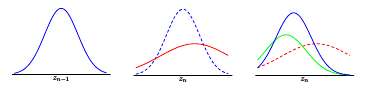

Fig.21 The linear dynamical system can be viewed as a sequence of steps in which increasing un- certainty in the state variable due to diffusion is compensated by the arrival of new data. In the left-hand plot, the blue curve shows the distribution $p(z_n−1 |x_1 , . . . , x_n−1 )$, which incorporates all the data up to step n − 1. The diffusion arising from the nonzero variance of the transition probability p(zn |zn−1 ) gives the distribution $p(z_n |x_1 , . . . , x_n−1 )$, shown in red in the centre plot. Note that this is broader and shifted relative to the blue curve (which is shown dashed in the centre plot for comparison). The next data observation xn contributes through the emission density $p(x_n |z_n )$, which is shown as a function of zn in green on the right-hand plot. Note that this is not a density with respect to zn and so is not normalized to one. Inclusion of this new data point leads to a revised distribution $p(z_n |x_1 , . . . , x_n )$ for the state density shown in blue. We see that observation of the data has shifted and narrowed the distribution compared to $p(z_n |x_1 , . . . , x_n−1 )$ (which is shown in dashed in the right-hand plot for comparison).


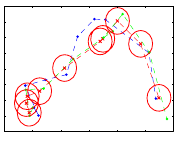


Fig.22 An illustration of a linear dy- namical system being used to track a moving object. The blue points indicate the true positions of the object in a two-dimensional space at successive time steps, the green points denote noisy measurements of the positions, and the red crosses indicate the means of the inferred posterior distributions of the positions ob- tained by running the Kalman ﬁl- tering equations. The covari- ances of the inferred positions are indicated by the red ellipses, which correspond to contours having one standard deviation.

##  Backward Recursion and Pairwise Posterior Marginals in LDS

Fig.22 illustrates a linear dynamical system being used to track a moving object. The blue points represent the true positions of the object in a two-dimensional space at successive time steps. The green points denote noisy measurements of the positions, and the red crosses indicate the means of the inferred posterior distributions of the positions obtained by running the Kalman filtering equations. The covariances of the inferred positions are indicated by the red ellipses, which correspond to contours having one standard deviation.

The backward recursion for the LDS can be expressed as:

$$
\beta(z_n) = \int \beta(z_{n+1}) p(x_{n+1} | z_{n+1}) p(z_{n+1} | z_n) \, dz_{n+1}
$$

Multiplying both sides of this equation by $ \alpha(z_n) $ and substituting the expressions for $ p(x_{n+1} | z_{n+1}) $ and $ p(z_{n+1} | z_n) $ from equations (13.75) and (13.76), we can make use of the Kalman filter update equations (13.89) and (13.90) to obtain the following update equations for the backward pass:

1. **Mean of \( z_n \):**

$$
\hat{\mu}_n = \mu_n + J_n (\hat{\mu}_{n+1} - A \mu_n)
$$

2. **Covariance of \( z_n \):**

$$
\hat{V}_n = V_n + J_n (\hat{V}_{n+1} - P_n) J_n^T
$$

Where the matrix $ J_n $ is defined as:

$$
J_n = V_n A^T P_n^{-1}
$$

Note that these recursions require that the forward pass be completed first so that the quantities $ \mu_n $ and $ V_n $ are available for the backward pass.

### Pairwise Posterior Marginals

For the Expectation-Maximization (EM) algorithm, we also require the pairwise posterior marginals, which can be obtained from the following expression:

$$
\xi(z_{n-1}, z_n) = \frac{1}{c_n} \hat{\alpha}(z_n) \hat{\beta}(z_{n-1}) p(x_n | z_n) p(z_n | z_{n-1})
$$

Substituting for $ \alpha(z_n) $ from equation (13.84), we see that $ \xi(z_{n-1}, z_n) $ is a Gaussian distribution with mean components $ \hat{\gamma}(z_{n-1}) $ and $ \hat{\gamma}(z_n) $, and covariance:

$$
\text{cov}[z_n, z_{n-1}] = J_{n-1} \hat{V}_n
$$


In [1]:
import numpy as np

# Define the Kalman filter and smoother functions

def kalman_filter(A, C, Γ, Σ, µ0, V0, x):
    """
    Kalman Filter forward pass
    Arguments:
        A, C: State transition and observation matrices
        Γ, Σ: Covariance matrices for process and observation noise
        µ0, V0: Initial state mean and covariance
        x: Observations (array of shape [n_timesteps, observation_dim])
        
    Returns:
        µ: State means (array of shape [n_timesteps, state_dim])
        V: State covariances (array of shape [n_timesteps, state_dim, state_dim])
        c: Likelihoods at each time step
    """
    n_timesteps = x.shape[0]
    state_dim = A.shape[0]
    observation_dim = x.shape[1]

    # Initialize arrays to store results
    µ = np.zeros((n_timesteps, state_dim))
    V = np.zeros((n_timesteps, state_dim, state_dim))
    c = np.zeros(n_timesteps)

    # Initial state estimate
    µ[0] = µ0
    V[0] = V0

    for n in range(1, n_timesteps):
        # Prediction step
        µ_pred = A @ µ[n-1]
        V_pred = A @ V[n-1] @ A.T + Γ
        
        # Update step
        innovation = x[n] - C @ µ_pred
        S = C @ V_pred @ C.T + Σ  # Innovation covariance
        K = V_pred @ C.T @ np.linalg.inv(S)  # Kalman gain
        
        µ[n] = µ_pred + K @ innovation
        V[n] = V_pred - K @ C @ V_pred
        
        # Compute likelihood for this time step
        c[n] = np.linalg.det(S)**(-0.5) * np.exp(-0.5 * innovation.T @ np.linalg.inv(S) @ innovation)
    
    return µ, V, c

def kalman_smoother(A, C, Γ, Σ, µ0, V0, x, µ, V):
    """
    Kalman Smoother backward pass
    Arguments:
        A, C: State transition and observation matrices
        Γ, Σ: Covariance matrices for process and observation noise
        µ0, V0: Initial state mean and covariance
        x: Observations (array of shape [n_timesteps, observation_dim])
        µ, V: State estimates from the Kalman filter
    Returns:
        smoothed_µ: Smoothed state means
        smoothed_V: Smoothed state covariances
    """
    n_timesteps = x.shape[0]
    state_dim = A.shape[0]

    # Initialize arrays for smoothed results
    smoothed_µ = np.zeros_like(µ)
    smoothed_V = np.zeros_like(V)

    # Start with the Kalman filter output at the last time step
    smoothed_µ[-1] = µ[-1]
    smoothed_V[-1] = V[-1]

    # Backward recursion
    for n in range(n_timesteps - 2, -1, -1):
        # Compute the smoothing gain
        J = V[n] @ A.T @ np.linalg.inv(V_pred)
        
        smoothed_µ[n] = µ[n] + J @ (smoothed_µ[n+1] - µ_pred)
        smoothed_V[n] = V[n] + J @ (smoothed_V[n+1] - V_pred) @ J.T
        
    return smoothed_µ, smoothed_V

# Example usage:

# Define the model parameters (assume 2D state, 2D observation)
A = np.array([[1, 0], [0, 1]])  # Identity transition matrix (no dynamics)
C = np.array([[1, 0], [0, 1]])  # Identity observation matrix
Γ = np.array([[0.1, 0], [0, 0.1]])  # Process noise covariance
Σ = np.array([[0.2, 0], [0, 0.2]])  # Observation noise covariance
µ0 = np.array([0, 0])  # Initial state mean
V0 = np.array([[1, 0], [0, 1]])  # Initial state covariance

# Create some synthetic data (e.g., noisy observations of a 2D moving object)
n_timesteps = 10
true_positions = np.cumsum(np.random.randn(n_timesteps, 2), axis=0)
observations = true_positions + np.random.normal(0, 0.2, size=(n_timesteps, 2))

# Apply Kalman filter
µ, V, c = kalman_filter(A, C, Γ, Σ, µ0, V0, observations)

# Apply Kalman smoother
smoothed_µ, smoothed_V = kalman_smoother(A, C, Γ, Σ, µ0, V0, observations, µ, V)

# Output the results
print("Filtered means (µ):")
print(µ)

print("\nSmoothed means (smoothed_µ):")
print(smoothed_µ)



NameError: name 'V_pred' is not defined

In [2]:
import numpy as np

# Define the Kalman filter and smoother functions

def kalman_filter(A, C, Γ, Σ, µ0, V0, x):
    """
    Kalman Filter forward pass
    Arguments:
        A, C: State transition and observation matrices
        Γ, Σ: Covariance matrices for process and observation noise
        µ0, V0: Initial state mean and covariance
        x: Observations (array of shape [n_timesteps, observation_dim])
        
    Returns:
        µ: State means (array of shape [n_timesteps, state_dim])
        V: State covariances (array of shape [n_timesteps, state_dim, state_dim])
        c: Likelihoods at each time step
    """
    n_timesteps = x.shape[0]
    state_dim = A.shape[0]
    observation_dim = x.shape[1]

    # Initialize arrays to store results
    µ = np.zeros((n_timesteps, state_dim))
    V = np.zeros((n_timesteps, state_dim, state_dim))
    c = np.zeros(n_timesteps)

    # Initial state estimate
    µ[0] = µ0
    V[0] = V0

    for n in range(1, n_timesteps):
        # Prediction step
        µ_pred = A @ µ[n-1]
        V_pred = A @ V[n-1] @ A.T + Γ
        
        # Update step
        innovation = x[n] - C @ µ_pred
        S = C @ V_pred @ C.T + Σ  # Innovation covariance
        K = V_pred @ C.T @ np.linalg.inv(S)  # Kalman gain
        
        µ[n] = µ_pred + K @ innovation
        V[n] = V_pred - K @ C @ V_pred
        
        # Compute likelihood for this time step
        c[n] = np.linalg.det(S)**(-0.5) * np.exp(-0.5 * innovation.T @ np.linalg.inv(S) @ innovation)
    
    return µ, V, c

def kalman_smoother(A, C, Γ, Σ, µ0, V0, x, µ, V):
    """
    Kalman Smoother backward pass
    Arguments:
        A, C: State transition and observation matrices
        Γ, Σ: Covariance matrices for process and observation noise
        µ0, V0: Initial state mean and covariance
        x: Observations (array of shape [n_timesteps, observation_dim])
        µ, V: State estimates from the Kalman filter
    Returns:
        smoothed_µ: Smoothed state means
        smoothed_V: Smoothed state covariances
    """
    n_timesteps = x.shape[0]
    state_dim = A.shape[0]

    # Initialize arrays for smoothed results
    smoothed_µ = np.zeros_like(µ)
    smoothed_V = np.zeros_like(V)

    # Start with the Kalman filter output at the last time step
    smoothed_µ[-1] = µ[-1]
    smoothed_V[-1] = V[-1]

    # Backward recursion
    for n in range(n_timesteps - 2, -1, -1):
        # Compute the predicted covariance (V_pred) for the next time step
        V_pred = A @ V[n] @ A.T + Γ

        # Compute the smoothing gain
        J = V[n] @ A.T @ np.linalg.inv(V_pred)
        
        # Compute smoothed state and covariance
        smoothed_µ[n] = µ[n] + J @ (smoothed_µ[n+1] - A @ µ[n])
        smoothed_V[n] = V[n] + J @ (smoothed_V[n+1] - V_pred) @ J.T
        
    return smoothed_µ, smoothed_V

# Example usage:

# Define the model parameters (assume 2D state, 2D observation)
A = np.array([[1, 0], [0, 1]])  # Identity transition matrix (no dynamics)
C = np.array([[1, 0], [0, 1]])  # Identity observation matrix
Γ = np.array([[0.1, 0], [0, 0.1]])  # Process noise covariance
Σ = np.array([[0.2, 0], [0, 0.2]])  # Observation noise covariance
µ0 = np.array([0, 0])  # Initial state mean
V0 = np.array([[1, 0], [0, 1]])  # Initial state covariance

# Create some synthetic data (e.g., noisy observations of a 2D moving object)
n_timesteps = 10
true_positions = np.cumsum(np.random.randn(n_timesteps, 2), axis=0)
observations = true_positions + np.random.normal(0, 0.2, size=(n_timesteps, 2))

# Apply Kalman filter
µ, V, c = kalman_filter(A, C, Γ, Σ, µ0, V0, observations)

# Apply Kalman smoother
smoothed_µ, smoothed_V = kalman_smoother(A, C, Γ, Σ, µ0, V0, observations, µ, V)

# Output the results
print("Filtered means (µ):")
print(µ)

print("\nSmoothed means (smoothed_µ):")
print(smoothed_µ)



Filtered means (µ):
[[ 0.          0.        ]
 [-0.14913465  0.37996495]
 [ 0.30420677  0.20881349]
 [ 1.53769055 -0.02273048]
 [ 2.36779556  0.35320519]
 [ 3.33024756  0.53995486]
 [ 3.1790609   1.3689534 ]
 [ 2.75838295  1.77241719]
 [ 2.69009729  2.45256512]
 [ 2.60850565  2.71412435]]

Smoothed means (smoothed_µ):
[[0.68895707 0.29805704]
 [0.75785278 0.32786274]
 [1.2937999  0.29707507]
 [2.15615962 0.37398873]
 [2.75338357 0.75708019]
 [3.13560237 1.15742619]
 [2.94138425 1.77354274]
 [2.70383812 2.17790993]
 [2.64930077 2.58334698]
 [2.60850565 2.71412435]]


In [3]:
import numpy as np

# Define the Kalman filter and smoother functions

def kalman_filter(A, C, Γ, Σ, µ0, V0, x):
    """
    Kalman Filter forward pass
    Arguments:
        A, C: State transition and observation matrices
        Γ, Σ: Covariance matrices for process and observation noise
        µ0, V0: Initial state mean and covariance
        x: Observations (array of shape [n_timesteps, observation_dim])
        
    Returns:
        µ: State means (array of shape [n_timesteps, state_dim])
        V: State covariances (array of shape [n_timesteps, state_dim, state_dim])
        c: Likelihoods at each time step
    """
    n_timesteps = x.shape[0]
    state_dim = A.shape[0]
    observation_dim = x.shape[1]

    # Initialize arrays to store results
    µ = np.zeros((n_timesteps, state_dim))
    V = np.zeros((n_timesteps, state_dim, state_dim))
    c = np.zeros(n_timesteps)

    # Initial state estimate
    µ[0] = µ0
    V[0] = V0

    for n in range(1, n_timesteps):
        # Prediction step
        µ_pred = A @ µ[n-1]
        V_pred = A @ V[n-1] @ A.T + Γ
        
        # Update step
        innovation = x[n] - C @ µ_pred
        S = C @ V_pred @ C.T + Σ  # Innovation covariance
        K = V_pred @ C.T @ np.linalg.inv(S)  # Kalman gain
        
        µ[n] = µ_pred + K @ innovation
        V[n] = V_pred - K @ C @ V_pred
        
        # Compute likelihood for this time step
        c[n] = np.linalg.det(S)**(-0.5) * np.exp(-0.5 * innovation.T @ np.linalg.inv(S) @ innovation)
    
    return µ, V, c

def kalman_smoother(A, C, Γ, Σ, µ0, V0, x, µ, V):
    """
    Kalman Smoother backward pass
    Arguments:
        A, C: State transition and observation matrices
        Γ, Σ: Covariance matrices for process and observation noise
        µ0, V0: Initial state mean and covariance
        x: Observations (array of shape [n_timesteps, observation_dim])
        µ, V: State estimates from the Kalman filter
    Returns:
        smoothed_µ: Smoothed state means
        smoothed_V: Smoothed state covariances
    """
    n_timesteps = x.shape[0]
    state_dim = A.shape[0]

    # Initialize arrays for smoothed results
    smoothed_µ = np.zeros_like(µ)
    smoothed_V = np.zeros_like(V)

    # Start with the Kalman filter output at the last time step
    smoothed_µ[-1] = µ[-1]
    smoothed_V[-1] = V[-1]

    # Backward recursion
    for n in range(n_timesteps - 2, -1, -1):
        # Compute the predicted covariance (V_pred) for the next time step
        V_pred = A @ V[n] @ A.T + Γ

        # Compute the smoothing gain
        J = V[n] @ A.T @ np.linalg.inv(V_pred)
        
        # Compute smoothed state and covariance
        smoothed_µ[n] = µ[n] + J @ (smoothed_µ[n+1] - A @ µ[n])
        smoothed_V[n] = V[n] + J @ (smoothed_V[n+1] - V_pred) @ J.T
        
    return smoothed_µ, smoothed_V

# Example usage:

# Define the model parameters (assume 2D state, 2D observation)
A = np.array([[1, 0], [0, 1]])  # Identity transition matrix (no dynamics)
C = np.array([[1, 0], [0, 1]])  # Identity observation matrix
Γ = np.array([[0.1, 0], [0, 0.1]])  # Process noise covariance
Σ = np.array([[0.2, 0], [0, 0.2]])  # Observation noise covariance
µ0 = np.array([0, 0])  # Initial state mean
V0 = np.array([[1, 0], [0, 1]])  # Initial state covariance

# Create some synthetic data (e.g., noisy observations of a 2D moving object)
n_timesteps = 10
true_positions = np.cumsum(np.random.randn(n_timesteps, 2), axis=0)
observations = true_positions + np.random.normal(0, 0.2, size=(n_timesteps, 2))

# Apply Kalman filter
µ, V, c = kalman_filter(A, C, Γ, Σ, µ0, V0, observations)

# Apply Kalman smoother
smoothed_µ, smoothed_V = kalman_smoother(A, C, Γ, Σ, µ0, V0, observations, µ, V)

# Output the results
print("Filtered means (µ):")
print(µ)

print("\nSmoothed means (smoothed_µ):")
print(smoothed_µ)



Filtered means (µ):
[[ 0.          0.        ]
 [-0.6874336  -0.10336693]
 [-1.4708953   0.55978709]
 [-2.75420996  1.55604914]
 [-4.1166094   2.39583909]
 [-5.00164822  3.36032452]
 [-5.3409778   3.14296197]
 [-5.77559713  3.37729961]
 [-7.17192933  3.70255972]
 [-8.08146704  3.6184872 ]]

Smoothed means (smoothed_µ):
[[-1.78497614  0.79372505]
 [-1.96347375  0.87309755]
 [-2.71749748  1.45009929]
 [-3.80382224  2.22594278]
 [-4.81737913  2.8728248 ]
 [-5.51202562  3.34564268]
 [-6.02128324  3.33099306]
 [-6.70121511  3.51892089]
 [-7.62670599  3.66052274]
 [-8.08146704  3.6184872 ]]


In [5]:
import math
import random
# Helper functions to perform matrix operations without numpy

def mat_mult(A, B):
    """Matrix multiplication of two 2D lists."""
    result = [[sum(A[i][k] * B[k][j] for k in range(len(A[0]))) for j in range(len(B[0]))] for i in range(len(A))]
    return result

def mat_add(A, B):
    """Matrix addition of two 2D lists."""
    return [[A[i][j] + B[i][j] for j in range(len(A[0]))] for i in range(len(A))]

def mat_sub(A, B):
    """Matrix subtraction of two 2D lists."""
    return [[A[i][j] - B[i][j] for j in range(len(A[0]))] for i in range(len(A))]

def mat_transpose(A):
    """Matrix transpose."""
    return [[A[j][i] for j in range(len(A))] for i in range(len(A[0]))]

def mat_inv(A):
    """Matrix inverse using the formula for 2x2 matrices."""
    det = A[0][0] * A[1][1] - A[0][1] * A[1][0]
    if det == 0:
        raise ValueError("Matrix is singular and cannot be inverted")
    inv = [[A[1][1] / det, -A[0][1] / det], [-A[1][0] / det, A[0][0] / det]]
    return inv

def mat_dot(v1, v2):
    """Dot product of two vectors."""
    return sum(v1[i] * v2[i] for i in range(len(v1)))

def mat_vect_mult(M, v):
    """Matrix-vector multiplication."""
    return [sum(M[i][j] * v[j] for j in range(len(M[0]))) for i in range(len(M))]

def vect_add(v1, v2):
    """Vector addition."""
    return [v1[i] + v2[i] for i in range(len(v1))]

def vect_sub(v1, v2):
    """Vector subtraction."""
    return [v1[i] - v2[i] for i in range(len(v1))]

# Kalman filter and smoother implementation without numpy

def kalman_filter(A, C, Γ, Σ, µ0, V0, x):
    """Kalman Filter forward pass."""
    n_timesteps = len(x)
    state_dim = len(A)
    observation_dim = len(x[0])

    # Initialize results
    µ = [µ0]
    V = [V0]
    c = []

    for n in range(1, n_timesteps):
        # Prediction step
        µ_pred = mat_vect_mult(A, µ[n-1])
        V_pred = mat_add(mat_mult(A, mat_mult(V[n-1], mat_transpose(A))), Γ)

        # Innovation step
        innovation = vect_sub(x[n], mat_vect_mult(C, µ_pred))
        S = mat_add(mat_mult(C, mat_mult(V_pred, mat_transpose(C))), Σ)
        S_inv = mat_inv(S)

        # Kalman gain
        K = mat_mult(V_pred, mat_mult(mat_transpose(C), S_inv))

        # Update state estimate and covariance
        µ.append(vect_add(µ_pred, mat_vect_mult(K, innovation)))
        V.append(mat_sub(V_pred, mat_mult(K, mat_mult(S, mat_transpose(K)))))

        # Compute likelihood
        det_S = S[0][0] * S[1][1] - S[0][1] * S[1][0]  # 2x2 determinant
        c.append(1.0 / math.sqrt(det_S) * math.exp(-0.5 * mat_dot(innovation, mat_vect_mult(S_inv, innovation))))

    return µ, V, c


def kalman_smoother(A, C, Γ, Σ, µ0, V0, x, µ, V):
    """Kalman Smoother backward pass."""
    n_timesteps = len(x)
    state_dim = len(A)

    # Initialize smoothed results
    smoothed_µ = [µ[-1]]
    smoothed_V = [V[-1]]

    for n in range(n_timesteps - 2, -1, -1):
        # Predicted covariance
        V_pred = mat_add(mat_mult(A, mat_mult(V[n], mat_transpose(A))), Γ)

        # Smoothing gain
        J = mat_mult(V[n], mat_mult(mat_transpose(A), mat_inv(V_pred)))

        # Compute smoothed state and covariance
        smoothed_µ.insert(0, vect_add(µ[n], mat_vect_mult(J, vect_sub(smoothed_µ[0], mat_vect_mult(A, µ[n])))))
        smoothed_V.insert(0, mat_add(V[n], mat_mult(J, mat_mult(mat_sub(smoothed_V[0], V_pred), mat_transpose(J)))))

    return smoothed_µ, smoothed_V


# Example usage:

# Define the model parameters
A = [[1, 0], [0, 1]]  # Identity transition matrix
C = [[1, 0], [0, 1]]  # Identity observation matrix
Γ = [[0.1, 0], [0, 0.1]]  # Process noise covariance
Σ = [[0.2, 0], [0, 0.2]]  # Observation noise covariance
µ0 = [0, 0]  # Initial state mean
V0 = [[1, 0], [0, 1]]  # Initial state covariance

# Create some synthetic data
n_timesteps = 10
true_positions = [[sum([random.gauss(0, 1) for _ in range(2)])] for _ in range(n_timesteps)]
observations = [[true_positions[i][0] + random.gauss(0, 0.2) for i in range(2)] for _ in range(n_timesteps)]

# Apply Kalman filter
µ, V, c = kalman_filter(A, C, Γ, Σ, µ0, V0, observations)

# Apply Kalman smoother
smoothed_µ, smoothed_V = kalman_smoother(A, C, Γ, Σ, µ0, V0, observations, µ, V)

# Output the results
print("Filtered means (µ):")
print(µ)

print("\nSmoothed means (smoothed_µ):")
print(smoothed_µ)


Filtered means (µ):
[[0, 0], [1.7459008477280038, 0.7496696646748593], [1.9696953155584833, 0.8961599064007989], [2.104981145773161, 0.7219794100632544], [2.150749593663599, 0.6775177304204567], [2.0645769972633174, 0.6281449942424588], [2.0478848807938363, 0.6526682537699673], [2.11908276392615, 0.7837290754366991], [2.196618352253566, 0.7889674035621024], [2.279070665233058, 0.79690419507739]]

Smoothed means (smoothed_µ):
[[1.7586594895785486, 0.704890474962908], [1.9345254385364035, 0.7753795224591988], [2.045985424014094, 0.7905717111499448], [2.1124668042396975, 0.698559141002772], [2.1196953217665437, 0.6759433850016193], [2.0889123978763564, 0.674382795999063], [2.113194405362745, 0.7205191496289463], [2.1784680674715493, 0.7883327875219257], [2.2378452164331413, 0.7929358674413843], [2.279070665233058, 0.79690419507739]]


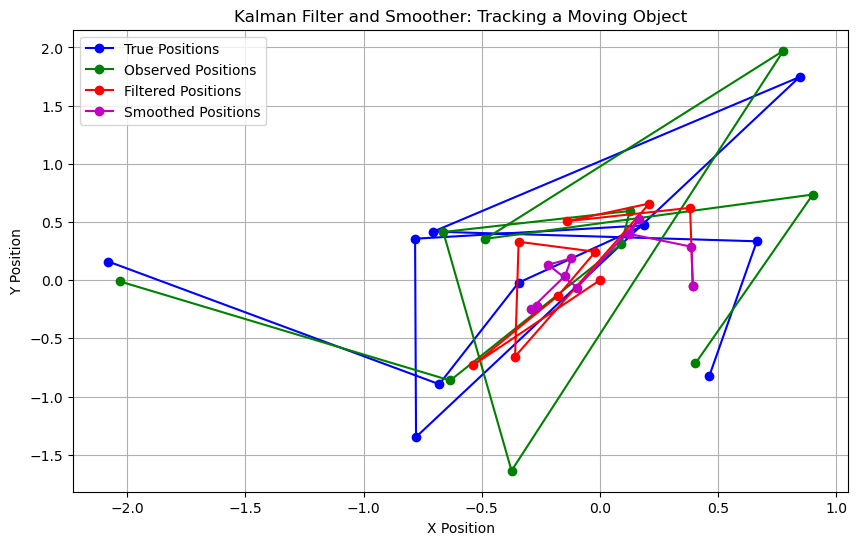

In [6]:
import math
import random
import matplotlib.pyplot as plt

# Helper functions to perform matrix operations without numpy
def mat_mult(A, B):
    result = [[sum(A[i][k] * B[k][j] for k in range(len(A[0]))) for j in range(len(B[0]))] for i in range(len(A))]
    return result

def mat_add(A, B):
    return [[A[i][j] + B[i][j] for j in range(len(A[0]))] for i in range(len(A))]

def mat_sub(A, B):
    return [[A[i][j] - B[i][j] for j in range(len(A[0]))] for i in range(len(A))]

def mat_transpose(A):
    return [[A[j][i] for j in range(len(A))] for i in range(len(A[0]))]

def mat_inv(A):
    det = A[0][0] * A[1][1] - A[0][1] * A[1][0]
    if det == 0:
        raise ValueError("Matrix is singular and cannot be inverted")
    inv = [[A[1][1] / det, -A[0][1] / det], [-A[1][0] / det, A[0][0] / det]]
    return inv

def mat_dot(v1, v2):
    return sum(v1[i] * v2[i] for i in range(len(v1)))

def mat_vect_mult(M, v):
    return [sum(M[i][j] * v[j] for j in range(len(M[0]))) for i in range(len(M))]

def vect_add(v1, v2):
    return [v1[i] + v2[i] for i in range(len(v1))]

def vect_sub(v1, v2):
    return [v1[i] - v2[i] for i in range(len(v1))]

# Kalman filter and smoother implementation without numpy
def kalman_filter(A, C, Γ, Σ, µ0, V0, x):
    n_timesteps = len(x)
    state_dim = len(A)
    observation_dim = len(x[0])

    # Initialize results
    µ = [µ0]
    V = [V0]
    c = []

    for n in range(1, n_timesteps):
        # Prediction step
        µ_pred = mat_vect_mult(A, µ[n-1])
        V_pred = mat_add(mat_mult(A, mat_mult(V[n-1], mat_transpose(A))), Γ)

        # Innovation step
        innovation = vect_sub(x[n], mat_vect_mult(C, µ_pred))
        S = mat_add(mat_mult(C, mat_mult(V_pred, mat_transpose(C))), Σ)
        S_inv = mat_inv(S)

        # Kalman gain
        K = mat_mult(V_pred, mat_mult(mat_transpose(C), S_inv))

        # Update state estimate and covariance
        µ.append(vect_add(µ_pred, mat_vect_mult(K, innovation)))
        V.append(mat_sub(V_pred, mat_mult(K, mat_mult(S, mat_transpose(K)))))

        # Compute likelihood
        det_S = S[0][0] * S[1][1] - S[0][1] * S[1][0]  # 2x2 determinant
        c.append(1.0 / math.sqrt(det_S) * math.exp(-0.5 * mat_dot(innovation, mat_vect_mult(S_inv, innovation))))

    return µ, V, c


def kalman_smoother(A, C, Γ, Σ, µ0, V0, x, µ, V):
    n_timesteps = len(x)
    state_dim = len(A)

    smoothed_µ = [µ[-1]]
    smoothed_V = [V[-1]]

    for n in range(n_timesteps - 2, -1, -1):
        V_pred = mat_add(mat_mult(A, mat_mult(V[n], mat_transpose(A))), Γ)
        J = mat_mult(V[n], mat_mult(mat_transpose(A), mat_inv(V_pred)))
        smoothed_µ.insert(0, vect_add(µ[n], mat_vect_mult(J, vect_sub(smoothed_µ[0], mat_vect_mult(A, µ[n])))))
        smoothed_V.insert(0, mat_add(V[n], mat_mult(J, mat_mult(mat_sub(smoothed_V[0], V_pred), mat_transpose(J)))))

    return smoothed_µ, smoothed_V


# Example usage:
A = [[1, 0], [0, 1]]  # Identity transition matrix
C = [[1, 0], [0, 1]]  # Identity observation matrix
Γ = [[0.1, 0], [0, 0.1]]  # Process noise covariance
Σ = [[0.2, 0], [0, 0.2]]  # Observation noise covariance
µ0 = [0, 0]  # Initial state mean
V0 = [[1, 0], [0, 1]]  # Initial state covariance

# Create some synthetic data
n_timesteps = 10
true_positions = [[random.gauss(0, 1), random.gauss(0, 1)] for _ in range(n_timesteps)]
observations = [[true_positions[i][0] + random.gauss(0, 0.2), true_positions[i][1] + random.gauss(0, 0.2)] for i in range(n_timesteps)]

# Apply Kalman filter
µ, V, c = kalman_filter(A, C, Γ, Σ, µ0, V0, observations)

# Apply Kalman smoother
smoothed_µ, smoothed_V = kalman_smoother(A, C, Γ, Σ, µ0, V0, observations, µ, V)

# Plot the results
# Extract filtered and smoothed results
filtered_x = [m[0] for m in µ]
filtered_y = [m[1] for m in µ]
smoothed_x = [m[0] for m in smoothed_µ]
smoothed_y = [m[1] for m in smoothed_µ]
observed_x = [obs[0] for obs in observations]
observed_y = [obs[1] for obs in observations]

plt.figure(figsize=(10, 6))

# Plot true positions, observed positions, and filtered/smoothed positions
plt.plot([pos[0] for pos in true_positions], [pos[1] for pos in true_positions], 'bo-', label='True Positions')
plt.plot(observed_x, observed_y, 'go-', label='Observed Positions')
plt.plot(filtered_x, filtered_y, 'ro-', label='Filtered Positions')
plt.plot(smoothed_x, smoothed_y, 'mo-', label='Smoothed Positions')

plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title('Kalman Filter and Smoother: Tracking a Moving Object')
plt.legend()
plt.grid(True)
plt.show()
